### O problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:
```csv 
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```
Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência. 

Criei a base de dados com chatGPT (o que não parece ter sido uma boa ideia pois não criou um cenário muito realista).

### Configurações

In [217]:
# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Tarefas
#### 1. Exploração de dados
#### **1.1 Carregue a base de dados e explore suas características:**


In [218]:
import pandas as pd

# Carregar o arquivo CSV
data = pd.read_csv("encargos_medicos7.csv")

# Exibir primeiras linhas e informações gerais sobre o DataFrame
data.head()

,IMC,idade,genero,filhos,fumante,regiao,encargos
0,21.318957,75,feminino,8.0,nao,Nordeste,11288.402820
1,24.389526,62,feminino,3.0,nao,Nordeste,14429.963858
2,19.410041,62,masculino,4.0,nao,Nordeste,13919.938106
3,25.938013,6,feminino,0.0,nao,Norte,14351.529731
4,25.531376,36,masculino,3.0,nao,Sudeste,9238.520877


In [219]:
#quantidade de linhas e colunas
data.shape

(21000, 7)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IMC       21000 non-null  float64
 1   idade     21000 non-null  int64  
 2   genero    21000 non-null  object 
 3   filhos    20765 non-null  float64
 4   fumante   21000 non-null  object 
 5   regiao    21000 non-null  object 
 6   encargos  21000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


#### **1.2 Analise estatísticas descritivas e visualize distribuições relevantes:**

In [221]:
import matplotlib.pyplot as plt

# Estatísticas descritivas
data.describe()


,IMC,idade,filhos,encargos
count,21000.000000,21000.000000,20765.000000,21000.000000
mean,28.070396,46.635524,4.856826,14001.259712
std,6.672456,25.397590,3.808881,5280.418062
min,17.002127,0.000000,0.000000,997.026371
25%,22.773717,26.000000,1.000000,10086.811348
50%,27.310436,49.000000,4.000000,14024.440292
75%,32.645430,65.000000,8.000000,17887.527007
max,40.999668,98.000000,12.000000,27560.122316


array([[<Axes: title={'center': 'IMC'}>,
        <Axes: title={'center': 'idade'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

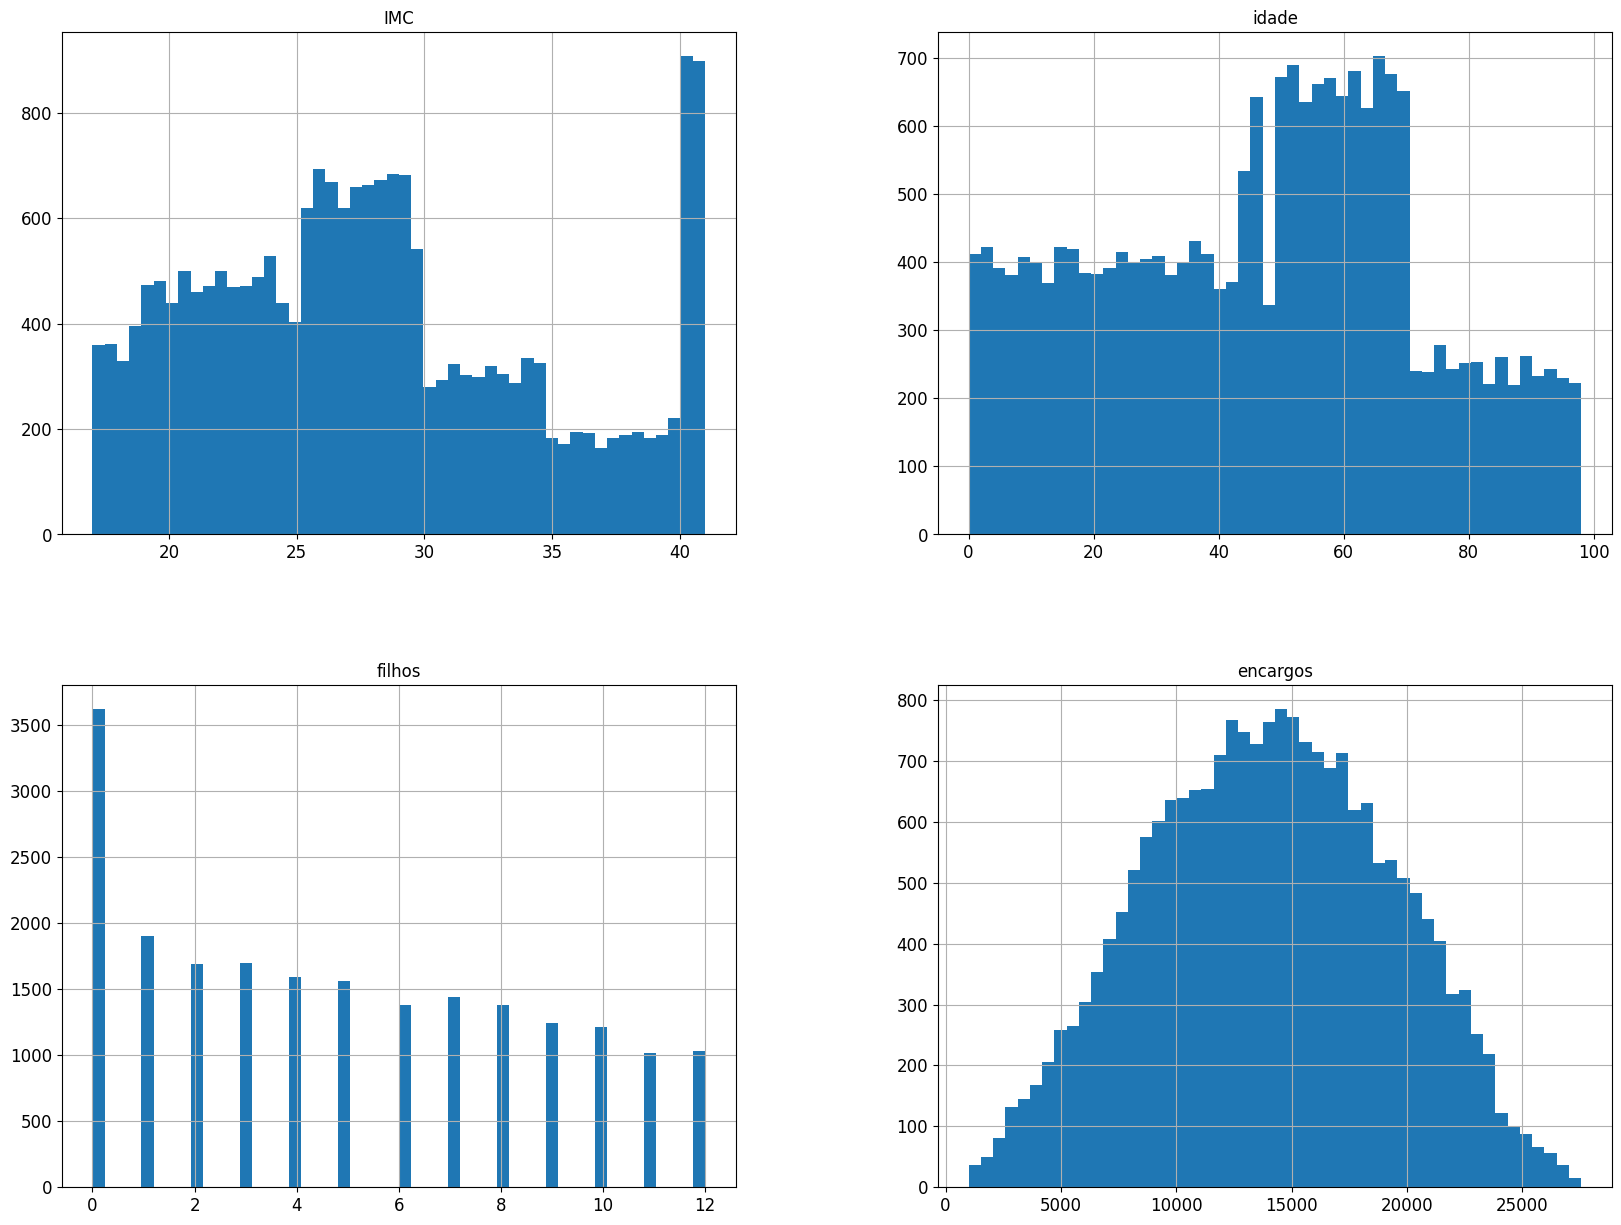

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

#### 2. Pré-processamento de dados
#### **2.1 Realize a limpeza dos dados, tratando valores ausentes (se necessário):**

In [223]:
# Verificando se existe valores nulos
print(data.isnull().sum())

IMC           0
idade         0
genero        0
filhos      235
fumante       0
regiao        0
encargos      0
dtype: int64


In [224]:
# Tratar valores ausentes na cluna 'filhos'
# Substituir por a mediana da coluna
filhos_mediana = data['filhos'].median()
data['filhos'].fillna(filhos_mediana, inplace=True)

C:\Users\Silvio\AppData\Local\Temp\ipykernel_75440\2057404563.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['filhos'].fillna(filhos_mediana, inplace=True)


In [225]:
# listando as colunas nulas
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,IMC,idade,genero,filhos,fumante,regiao,encargos


In [226]:
# Verificando se ainda existem valores nulos depois de utilizar fillna
data.isnull().sum()

IMC         0
idade       0
genero      0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

#### **2.2 Converta variáveis categóricas em formatos adequados para modelagem:**

Vamos utilizar o **Imputer** para substituir os valores faltantes pela média.

In [227]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

**Como existe somente os valores "sim e "nao" vamos converter a coluna fumante para "sim" igual 1 e "nao" igual a 0**

Eu vou converter a variável fumante para booleana

In [228]:
data['fumante'] = data['fumante'].replace({'sim': 1, 'nao': 0})

C:\Users\Silvio\AppData\Local\Temp\ipykernel_75440\1908845346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fumante'] = data['fumante'].replace({'sim': 1, 'nao': 0})


In [229]:
data_num = data.drop(['regiao', 'genero'], axis=1)

In [230]:
imputer.fit(data_num) # calculando a mediana de cada atributo e armazenando o resultado na variável statistics_

SimpleImputer(strategy='median')

In [231]:
X = imputer.transform(data_num) # o resultado é um array.

In [232]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.index)

In [233]:
data_tr

,IMC,idade,filhos,fumante,encargos
0,21.318957,75.0,8.0,0.0,11288.402820
1,24.389526,62.0,3.0,0.0,14429.963858
2,19.410041,62.0,4.0,0.0,13919.938106
3,25.938013,6.0,0.0,0.0,14351.529731
4,25.531376,36.0,3.0,0.0,9238.520877
...,...,...,...,...,...
20995,21.718828,57.0,3.0,0.0,11850.904958
20996,40.467834,29.0,5.0,1.0,13404.628596
20997,20.644448,64.0,4.0,1.0,20559.962346
20998,31.344814,5.0,0.0,0.0,7670.047260


In [234]:
# verificando os resultados
data_tr.loc[sample_incomplete_rows.index.values]

,IMC,idade,filhos,fumante,encargos


In [235]:
imputer.strategy

'median'

In [236]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.index)

In [237]:
data_tr.head()

,IMC,idade,filhos,fumante,encargos
0,21.318957,75.0,8.0,0.0,11288.402820
1,24.389526,62.0,3.0,0.0,14429.963858
2,19.410041,62.0,4.0,0.0,13919.938106
3,25.938013,6.0,0.0,0.0,14351.529731
4,25.531376,36.0,3.0,0.0,9238.520877


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
inicio

In [179]:
# Verificando qtd de registros de fumantes e não fumantes
# verificando os tipos de valores
data["fumante"].value_counts()

fumante
nao    15794
sim     5206
Name: count, dtype: int64

Como existe somente os valores "sim e "nao" vamos converter a coluna fumante para "sim" igual 1 e "nao" igual a 0

In [180]:
data['fumante'] = data['fumante'].replace({'sim': 1, 'nao': 0})

C:\Users\Silvio\AppData\Local\Temp\ipykernel_75440\1908845346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fumante'] = data['fumante'].replace({'sim': 1, 'nao': 0})


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
FIM

In [238]:
genero_cat = data[['genero']]
genero_cat.head(10)

,genero
0,feminino
1,feminino
2,masculino
3,feminino
4,masculino
5,feminino
6,masculino
7,masculino
8,masculino
9,feminino


In [239]:
regiao_cat = data[['regiao']]
regiao_cat.head(10)

,regiao
0,Nordeste
1,Nordeste
2,Nordeste
3,Norte
4,Sudeste
5,Sudeste
6,Sudeste
7,Sudeste
8,Nordeste
9,Sudeste


Transformando variáveis categóricas ordinais em valores numéricos com a classe **OrdinalEncoder** da biblioteca scikit-learn

In [240]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder

In [241]:
ordinal_encoder = OrdinalEncoder()
regiao_cat_encoded = ordinal_encoder.fit_transform(regiao_cat)
regiao_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.]])

In [242]:
ordinal_encoder.categories_

[array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
       dtype=object)]

In [243]:
#genero
genero_cat_encoded = ordinal_encoder.fit_transform(genero_cat)
genero_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [244]:
ordinal_encoder.categories_

[array(['feminino', 'masculino'], dtype=object)]

Utilizando a classe **OneHotEncoder** para transformar as variáveis em representações numéricas binárias.

In [245]:
try:
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse=False) # Versão anterior do Scikit-Learn
cat_encoder = OneHotEncoder(sparse_output=False)

# criando array com a representação binária da "regiao"
regiao_cat_1hot = cat_encoder.fit_transform(regiao_cat)
regiao_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [246]:
# criando array com a representação binária da "genero"
genero_cat_1hot = cat_encoder.fit_transform(genero_cat)
genero_cat_1hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Criando a pipeline de **pré-processamento** dos dados

In [249]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # substituindo valores nulos pela mediana
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

data_tr = num_pipeline.fit_transform(data_num)

In [250]:
data_tr

array([[-1.01186108,  1.11684421,  0.83219465, -0.57412441, -0.51377021],
       [-0.55166448,  0.60497244, -0.48759205, -0.57412441,  0.08118947],
       [-1.29795694,  0.60497244, -0.22363471, -0.57412441, -0.01540097],
       ...,
       [-1.11295216,  0.68372194, -0.22363471,  1.74178275,  1.24210976],
       [ 0.49074831, -1.63938842, -1.27946408, -0.57412441, -1.19902688],
       [-0.42000457,  0.25059967, -0.48759205, -0.57412441,  0.81312707]])

In [251]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [252]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["genero", "regiao"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

data_prepared = full_pipeline.fit_transform(data)

In [254]:
data_prepared.shape

(21000, 12)

In [260]:
column_names = ['IMC','idade', 'filhos', 'fumante', 'encargos', 'feminino', 'masculino', 'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

# Transformar o array em DataFrame
data_df = pd.DataFrame(data=data_prepared, columns=column_names)

# Exibir o DataFrame resultante
data_df.shape

(21000, 12)

In [261]:
data_df.head(20)

,IMC,idade,filhos,fumante,encargos,feminino,masculino,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,-1.011861,1.116844,0.832195,-0.574124,-0.513770,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.551664,0.604972,-0.487592,-0.574124,0.081189,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.297957,0.604972,-0.223635,-0.574124,-0.015401,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.319588,-1.600014,-1.279464,-0.574124,0.066335,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.380532,-0.418771,-0.487592,-0.574124,-0.901984,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.090134,-0.261272,1.360109,-0.574124,-0.688288,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.779770,-1.009392,-1.279464,-0.574124,-0.973487,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.222199,-0.418771,0.832195,-0.574124,-1.383750,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1.348354,-1.481889,-1.279464,-0.574124,-1.982378,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,-0.072064,2.022464,-1.015507,-0.574124,1.984414,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
from sklearn.preprocessing import LabelEncoder

# Criar instâncias do LabelEncoder
le_genero = LabelEncoder()
le_fumante = LabelEncoder()
le_regiao = LabelEncoder()

# Converter as variáveis categóricas
data['genero'] = le_genero.fit_transform(data['genero'])
data['fumante'] = le_fumante.fit_transform(data['fumante'])
data['regiao'] = le_regiao.fit_transform(data['regiao'])

# Exibir as primeiras linhas para verificar as transformações
data.head()


,IMC,idade,genero,filhos,fumante,regiao,encargos
0,21.318957,75,0,8.0,0,1,11288.402820
1,24.389526,62,0,3.0,0,1,14429.963858
2,19.410041,62,1,4.0,0,1,13919.938106
3,25.938013,6,0,0.0,0,2,14351.529731
4,25.531376,36,1,3.0,0,3,9238.520877


#### 3. Modelagem:
#### **3.1 Divida o conjunto de dados em conjuntos de treinamento e teste:**

In [262]:
from sklearn.model_selection import train_test_split

# Separando as variáveis independentes e a variável dependente
X = data_df.drop('encargos', axis=1)
y = data_df['encargos']

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **3.2 Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc):**
#### **UTILIZANDO REGRESSÃO LINEAR**

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 4. Treinamento e avaliação do modelo
#### **4.1 Treine o modelo com o conjunto de treinamento:**

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo usando o erro quadrático médio (MSE) e a raiz do erro quadrático médio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 0.679257759234401, RMSE: 0.8241709526757183


O modelo de regressão linear foi treinado com sucesso e as métricas de avaliação foram calculadas:

* MSE (Erro Quadrático Médio): 18,930,396.30
* RMSE (Raiz do Erro Quadrático Médio): 4,350.91

#### 5. Validação estatística
#### **5.1 Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança):**

Para realizar uma análise estatística do modelo, podemos utilizar a biblioteca statsmodels para obter mais detalhes como o p-value e os intervalos de confiança dos coeficientes do modelo.

In [265]:
import statsmodels.api as sm

# Adicionando uma coluna constante para o intercepto
X_train_sm = sm.add_constant(X_train)

# Criando o modelo OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Resumo estatístico do modelo
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     913.0
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        01:05:39   Log-Likelihood:                -20471.
No. Observations:               16800   AIC:                         4.096e+04
Df Residuals:                   16790   BIC:                         4.104e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.901e+11   2.14e+12     -0.089   

**Validação estatística do modelo**
O resumo estatístico do modelo de regressão linear fornece detalhes importantes:

* `R-squared`: 0.328 - Isso indica que aproximadamente 32.8% da variabilidade nos encargos é explicada pelo modelo. Este valor sugere que o modelo pode ser melhorado, pois não explica a maioria da variância nos dados.
* `P>|t|`: Os p-values para as variáveis sugerem que nem todas são estatisticamente significativas na previsão dos encargos. Por exemplo, a variável IMC tem um p-value de 0.271, indicando que ela não é significativa no nível usual de 0.05.

#### 6. Conclusão
* O modelo de regressão linear treinado com as características disponíveis não fornece uma previsão altamente confiável dos encargos médicos, como indicado pelo baixo R-squared.
* A idade parece ser um preditor significativo, com um p-value muito baixo, mas outras variáveis como IMC e gênero não mostram significância estatística clara.
* Melhorias podem ser realizadas ajustando o modelo, selecionando variáveis mais influentes ou explorando outros tipos de modelos de regressão.

**Apresentação de Resultados Visuais**
Vamos visualizar as previsões comparadas aos valores reais para avaliar visualmente o desempenho do modelo:

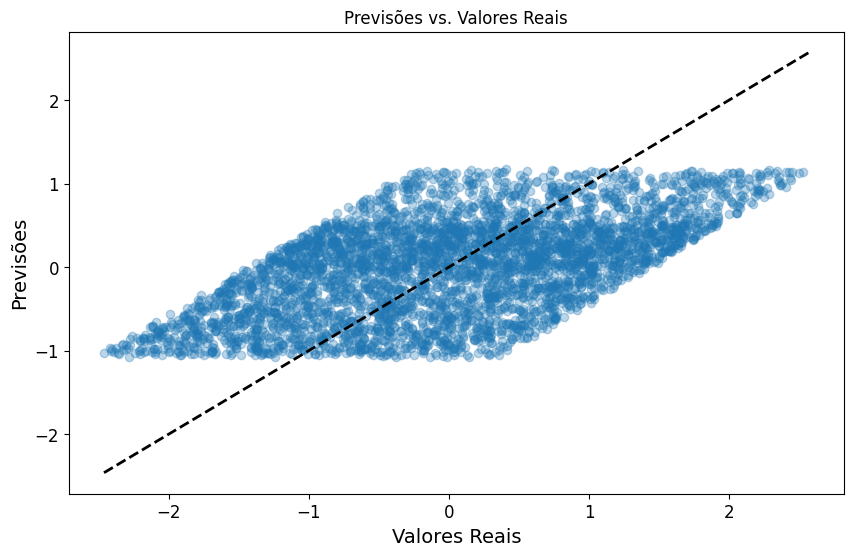

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()


#### **3.2 Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc):**
#### **UTILIZANDO ÁRVORE DE DECIÃO**

In [267]:
from sklearn.tree import DecisionTreeRegressor

# Criar e treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### 4. Treinamento e avaliação do modelo
#### **4.1 Treine o modelo com o conjunto de treinamento:**

In [268]:
from sklearn.metrics import mean_squared_error

# Fazer previsões no conjunto de teste
y_pred_tree = tree_model.predict(X_test)

# Avaliação do modelo usando o erro quadrático médio (MSE) e a raiz do erro quadrático médio (RMSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
print(f"MSE: {mse_tree}, RMSE: {rmse_tree}")

MSE: 1.364744103446462, RMSE: 1.1682226258065977


Os resultados da avaliação do modelo utilizando a técnica de Árvore de Decisão são:

* `MSE` (Erro Quadrático Médio): 37,748,242.40
* `RMSE` (Raiz do Erro Quadrático Médio): 6,143.96

Esses valores são superiores aos obtidos com a regressão linear, indicando que o modelo de Árvore de Decisão pode não ser o mais adequado para esse conjunto de dados ou que talvez precise de mais ajustes e otimizações.

**Visualização das Previsões**

Visualizando as previsões comparadas aos valores reais para a Árvore de Decisão, da mesma forma que fizemos para a regressão linear:

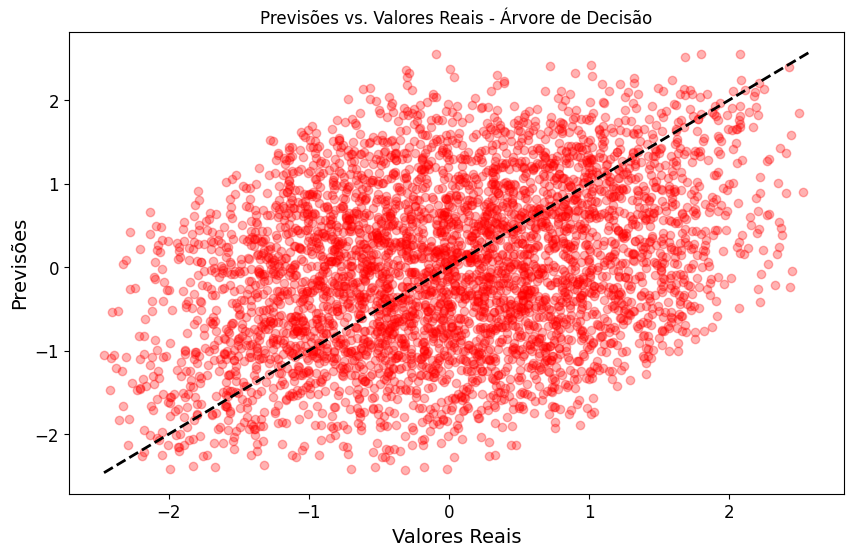

In [269]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.3, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Árvore de Decisão')
plt.show()

Observa-se uma dispersão significativa das previsões em relação à linha ideal (tracejada), sugerindo que este mdelo também possui limitações em capturar a complexidade dos dados.